In [33]:
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [4]:
train_evaluation = pd.read_csv('data/OpenPart.csv')
test_evaluation = pd.read_csv('data/SecretPart_dummy.csv')

In [64]:
train_names = train_evaluation['Case']
test_names = test_evaluation['Case']
indices = np.random.choice(train_names.shape[0], 15, replace=False)
val_names = train_names[indices]
train_names = train_names[[i for i in range(len(train_names)) if i not in indices]]
print('train size =', len(train_names))
print('validation size =', len(val_names))

train size = 45
validation size = 15


In [49]:
def load_data(names, folder, ending):
    data = []
    for name in names:
        image = cv2.imread(folder + '/' + name.split('.')[0] + ending + '.png', 0)
        image = (image > 10).astype(np.int_)
        data.append(image)
    return data

train_data = [
    load_data(train_names, 'data/sample_1', '_s1'),
    load_data(train_names, 'data/sample_2', '_s2'),
    load_data(train_names, 'data/sample_3', '_s3')
]
val_data = [
    load_data(val_names, 'data/sample_1', '_s1'),
    load_data(val_names, 'data/sample_2', '_s2'),
    load_data(val_names, 'data/sample_3', '_s3')
]
test_data = [
    load_data(test_names, 'data/sample_1', '_s1'),
    load_data(test_names, 'data/sample_2', '_s2'),
    load_data(test_names, 'data/sample_3', '_s3')
]
expert_train = load_data(train_names, 'data/expert', '_expert')
expert_test = load_data(test_names, 'data/expert', '_expert')

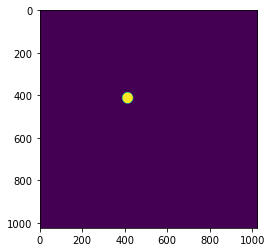

In [63]:
plt.imshow(train_data[0][0])